<a href="https://colab.research.google.com/github/guptankit005/Analytics/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data 

In [ ]:
#importing data from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#converting data into pandas dataframe
canc_data = pd.DataFrame(data.data, columns=data.feature_names)

#adding target field to the dataset
canc_data['target'] = pd.Series(data.target)

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
#printing first five rows of data
#canc_data.head()

#checking information about all the columns
#canc_data.info()

#checking basic statistical distribution of data
#canc_data.describe().transpose()

#checking for null values
#canc_data.isnull().sum()

#checking for duplicate rows
#canc_data.duplicated().sum()

canc_data['target'].value_counts()
#value count to see if data is balanced or imbalanced.

1    357
0    212
Name: target, dtype: int64

In [ ]:
#creating X and y
X_feature = list(canc_data.columns)
X_feature.remove('target')

X = canc_data[X_feature]
y = canc_data['target']

In [ ]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=3000).fit(X, y)

In [ ]:
#predicting for our test data
y_pred = clf.predict(X_test)

In [ ]:
#generating classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        69
           1       0.96      0.97      0.97       102

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
#importing libraries to check model performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import metrics

In [ ]:
print("Accuracy score on test: " , round((clf.score(X_test, y_test)),3))
print("Accuracy score on train: ", round((clf.score(X_train, y_train)),3))

#printing log loss for the model
print('log_loss : ', log_loss(y_test, y_pred))

Accuracy score on test:  0.959
Accuracy score on train:  0.96
log_loss :  1.413886743591203


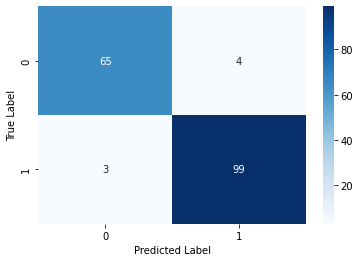

In [ ]:
#generating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
#let find ROC and AUC score
#before we calculate roc_auc_score(), we need to find out the predicted probabilityiies for test data.

pred_prob = pd.DataFrame(clf.predict_proba(X_test))
pred_prob.head()

,0,1
0,0.999968,0.000032
1,0.304960,0.695040
2,0.999767,0.000233
3,0.000004,0.999996
4,0.001765,0.998235


In [ ]:
#we'll also add the actual label

test_result = pd.DataFrame( { 'actual' : y_test})
test_result = test_result.reset_index()

test_result['prob_0'] = pred_prob.iloc[:,0:1]
test_result['prob_1'] = pred_prob.iloc[:,1:2]

test_result.head()

,index,actual,prob_0,prob_1
0,400,0,0.999968,0.000032
1,225,1,0.304960,0.695040
2,321,0,0.999767,0.000233
3,173,1,0.000004,0.999996
4,506,1,0.001765,0.998235


In [ ]:
#to calculate ROC AUC score we will pass actual class labels and predicted probability 

auc_score = round(metrics.roc_auc_score(test_result.actual, test_result.prob_1),3)
auc_score

0.996